In [15]:
import numpy as np
import rdkit.Chem as Chem
from rdkit import DataStructs
from tqdm import tqdm
import math
import random
from rdkit.Chem import *
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import cairosvg
import rdkit.Geometry.rdGeometry as Geo
from IPython.display import SVG, display

In [4]:
dataset_dict = {
    'sol': 'regression',
    'bace': 'classification',
    'bbbp': 'classification',
    'lipo': 'regression',
    'ames': 'classification',
}

def get_data(dataset_name):
    # Given dataset name, output the data in a list of (smiles, label)
    dataset_path = '../data/%s' % dataset_name
    raw_data_path = '%s/raw.csv' % dataset_path
    # Assumes data has 1 label, stores label has float
    data = []
    with open(raw_data_path, 'r+') as raw_data_file:
        for line in raw_data_file.readlines():
            smiles, label = line.strip().split(',')
            label = float(label)
            data.append((smiles, label))
    return data

def get_label_statistics(labels, should_print=False):
    # Returns label statistics to determine label similarity thresholds
    labels_arr = np.array(labels)
    label_mean = np.mean(labels_arr)
    label_std = np.std(labels_arr)
    
    if should_print:
        print('Label mean: %.3f, Label standard dev: %.3f' % (label_mean, label_std))
    return label_mean, label_std

In [99]:
dataset = 'bace'
data = get_data(dataset)
print('Number of datapoints loaded: %d' % len(data))

smiles_list, labels_list = zip(*data)
_, _ = get_label_statistics(labels_list, should_print=True)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
for mol in mol_list:
    Chem.Kekulize(mol)
print(len(mol_list))

Number of datapoints loaded: 1513
Label mean: 0.457, Label standard dev: 0.498
1513


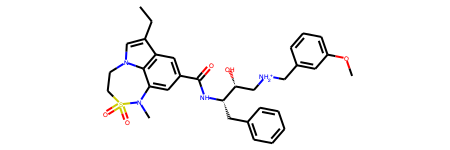

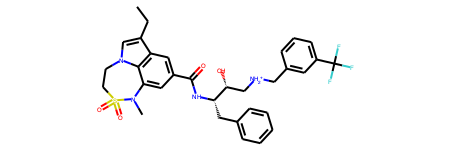

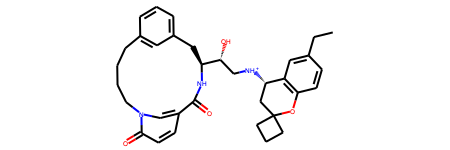

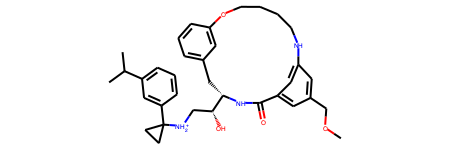

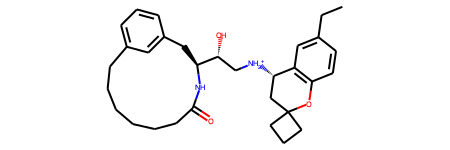

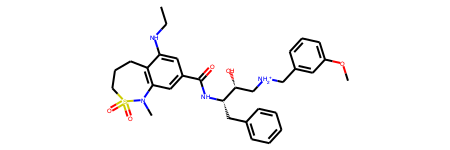

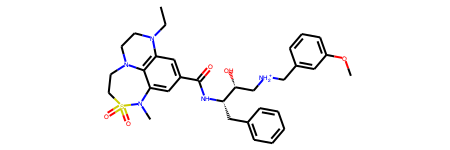

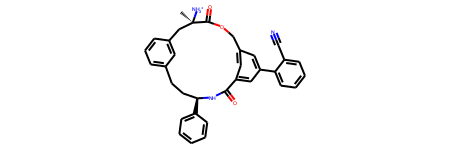

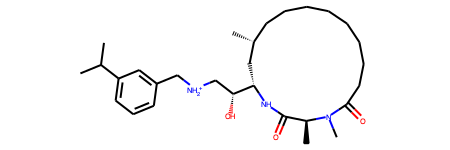

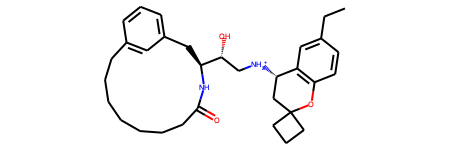

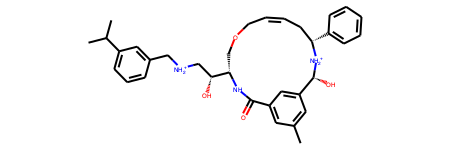

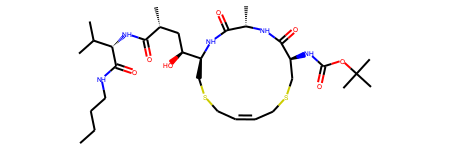

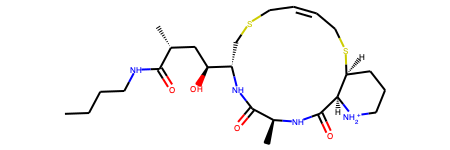

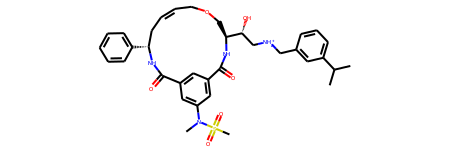

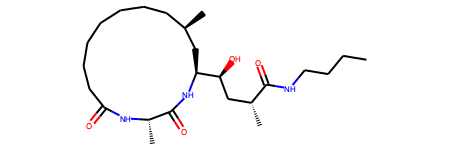

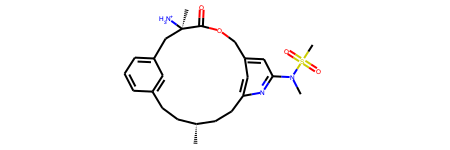

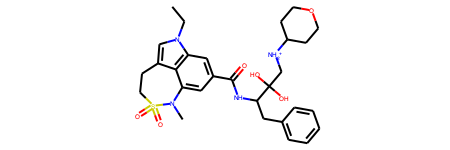

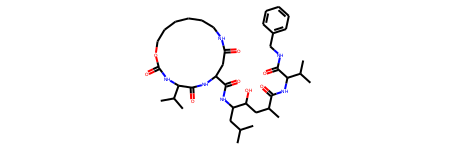

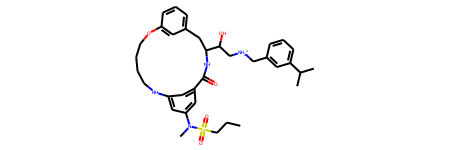

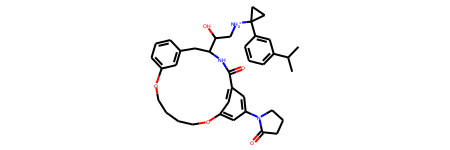

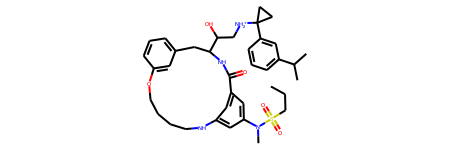

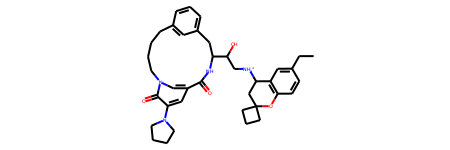

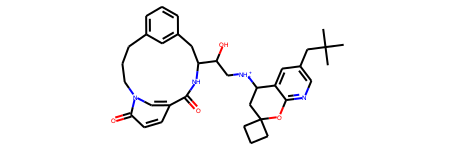

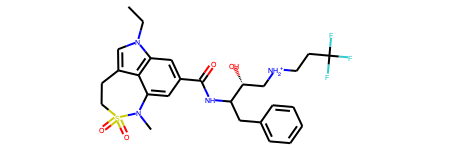

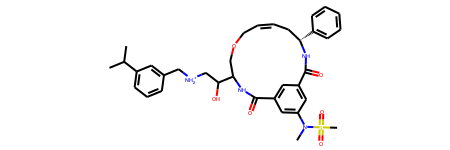

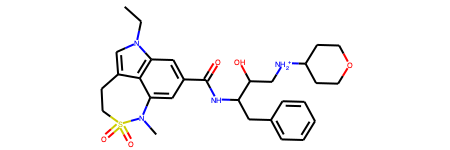

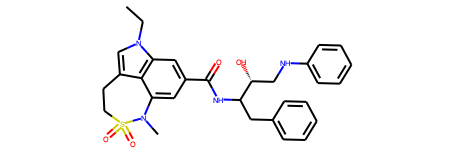

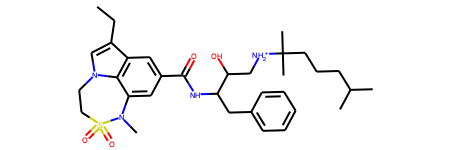

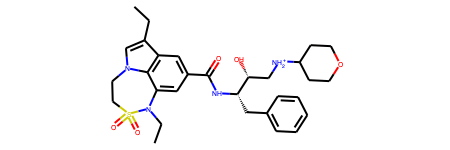

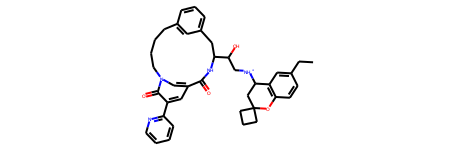

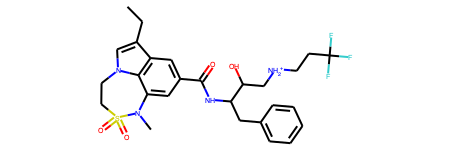

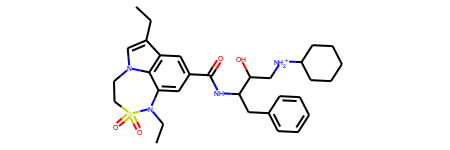

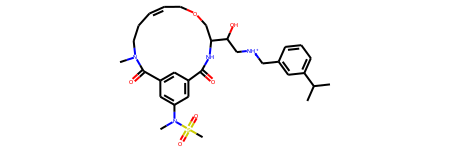

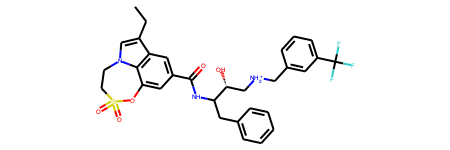

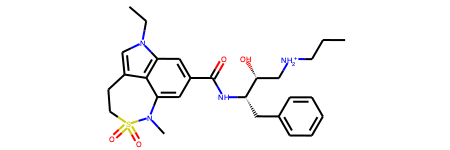

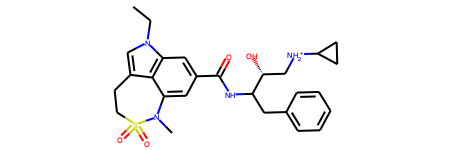

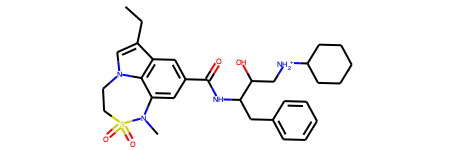

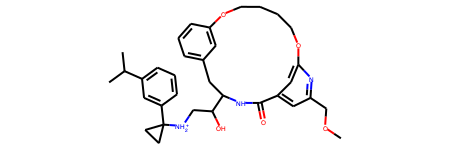

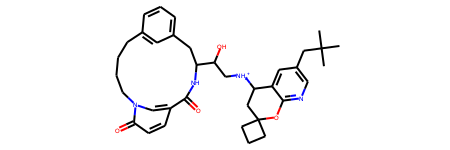

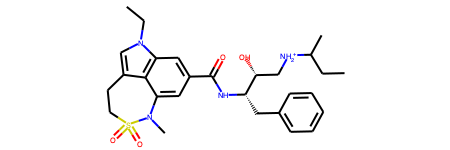

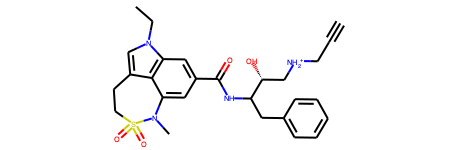

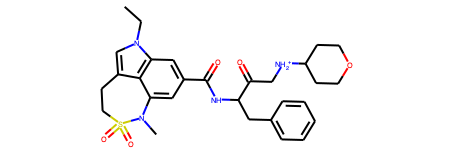

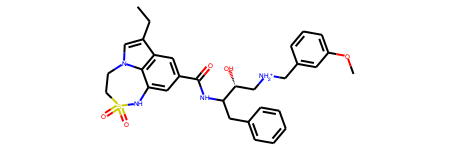

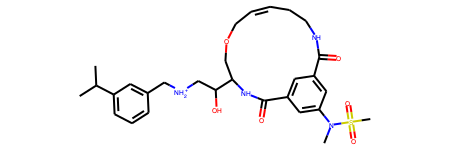

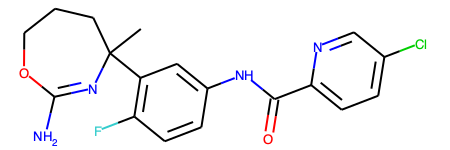

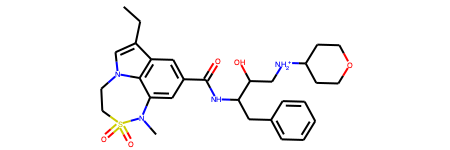

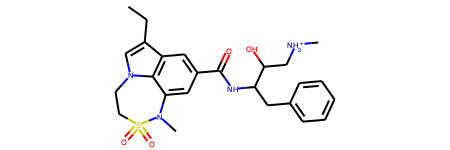

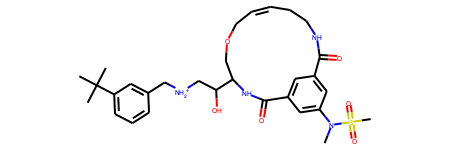

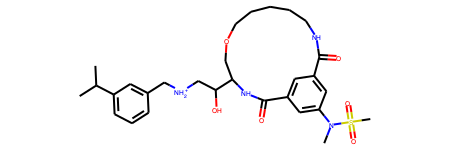

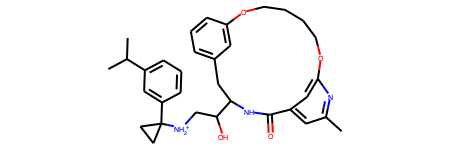

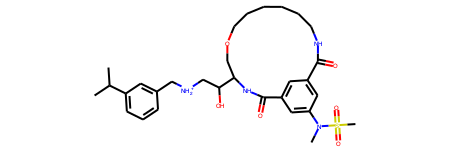

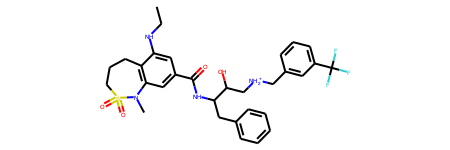

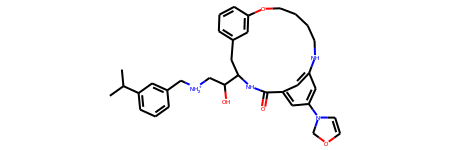

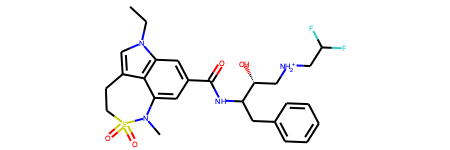

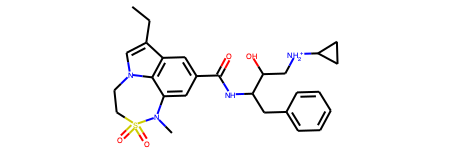

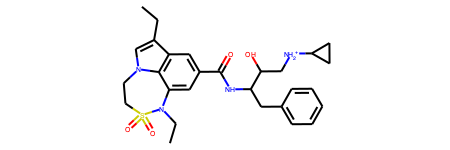

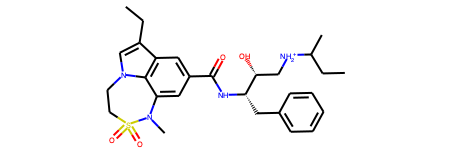

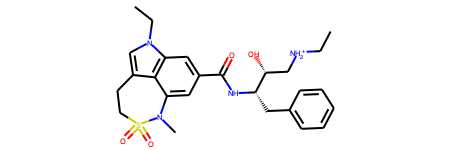

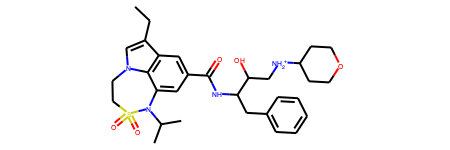

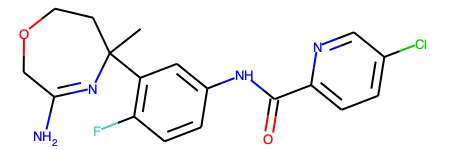

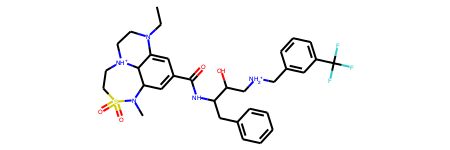

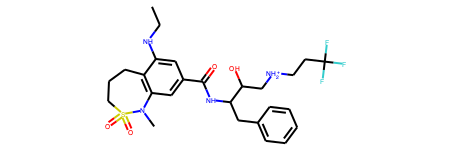

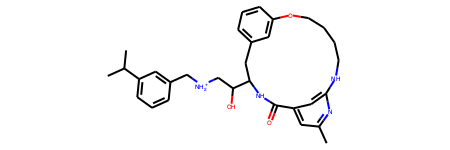

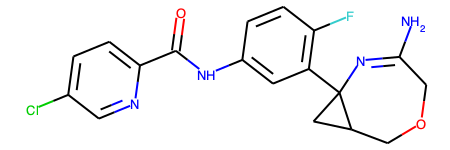

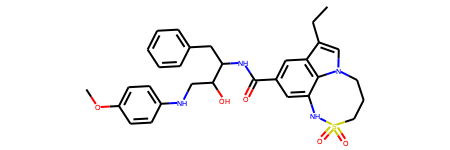

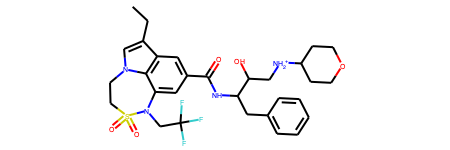

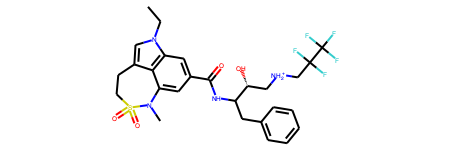

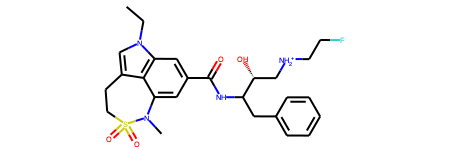

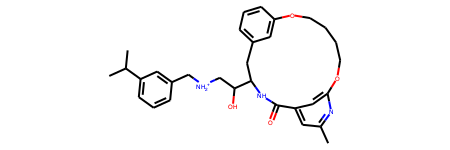

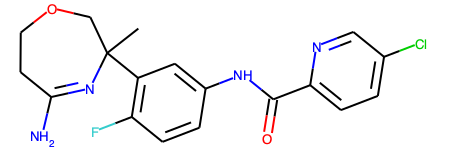

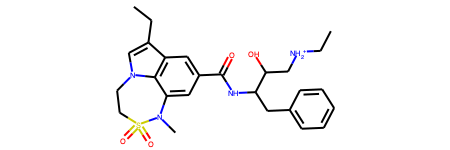

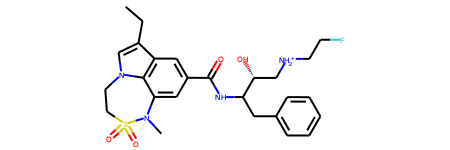

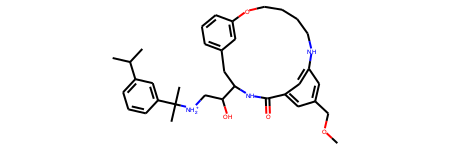

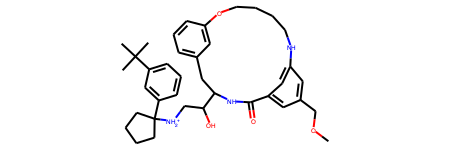

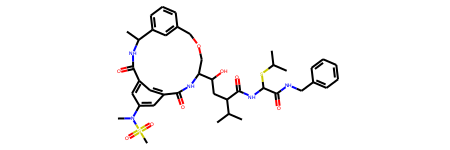

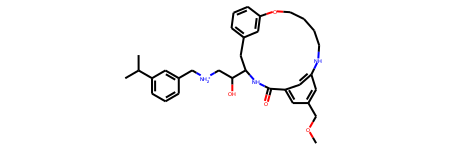

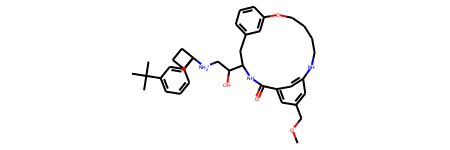

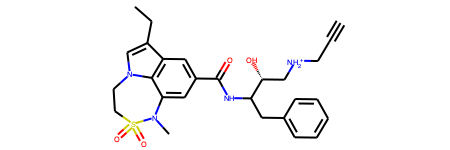

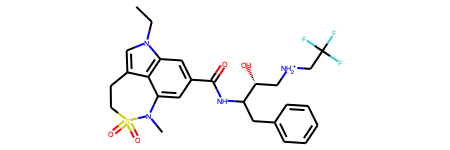

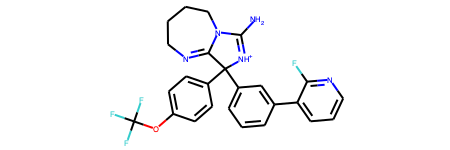

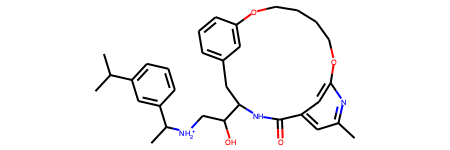

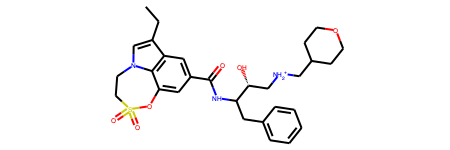

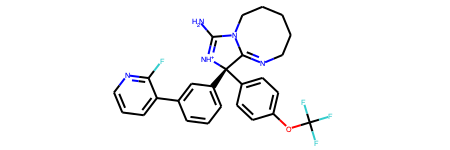

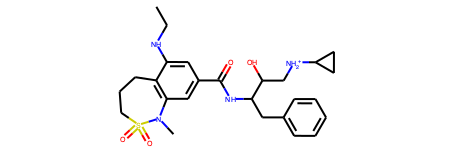

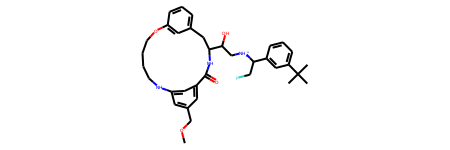

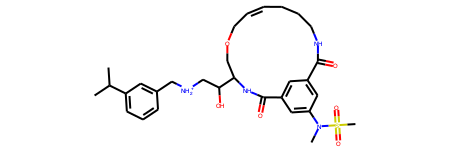

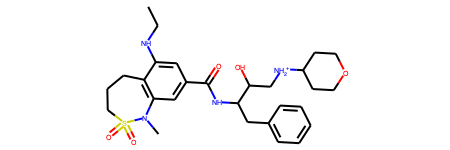

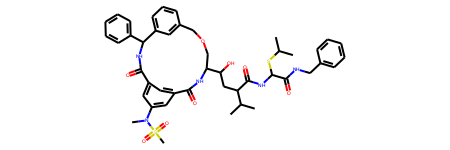

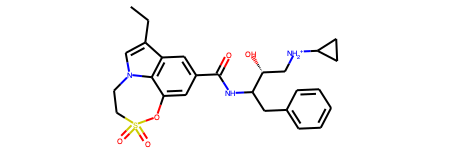

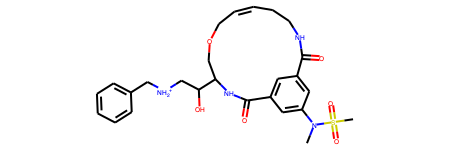

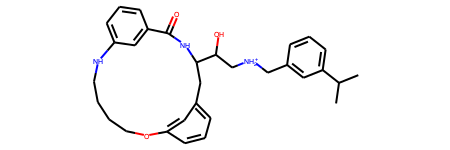

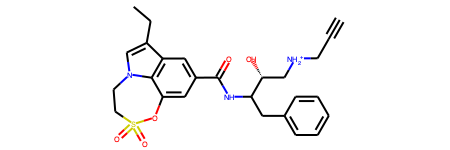

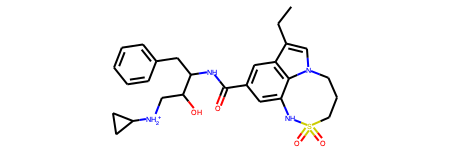

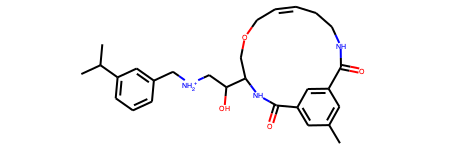

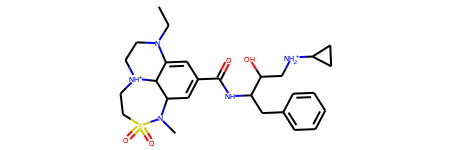

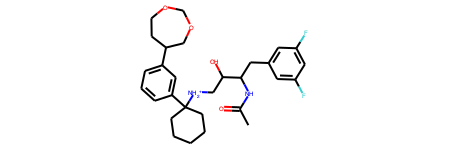

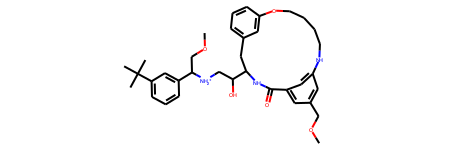

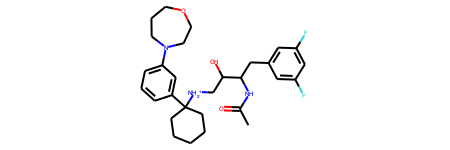

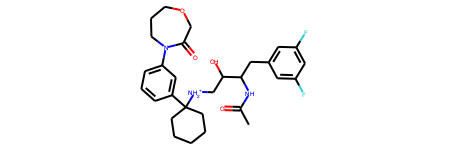

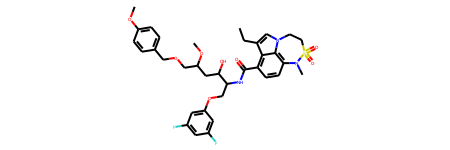

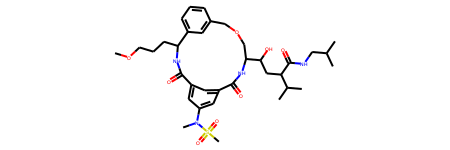

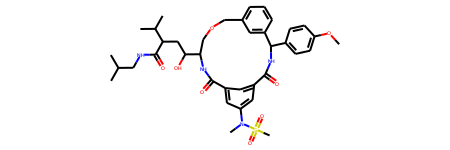

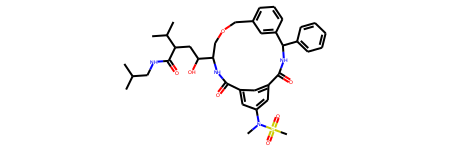

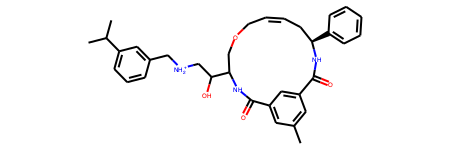

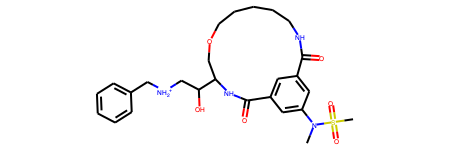

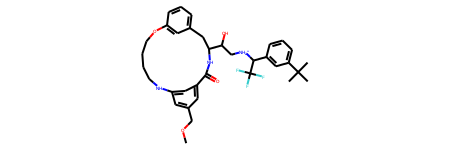

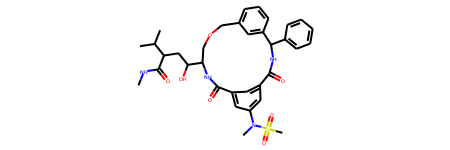

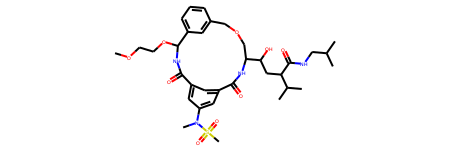

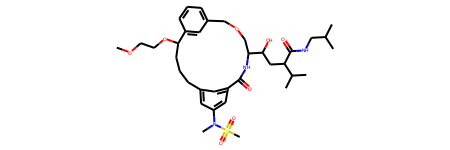

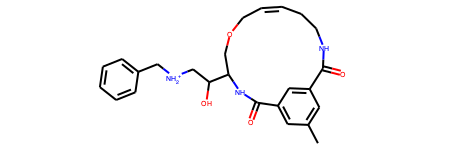

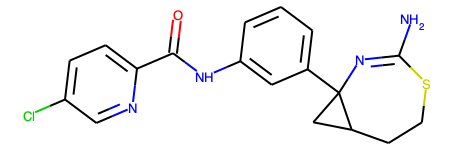

171  ,  111


In [107]:
dist_smiles_rings = {}

num_mols_heptagons = 0

for mol in mol_list:
    rings = mol.GetRingInfo().BondRings()
    has_heptagon = 0
    for i in range(len(rings)):
        ri = PathToSubmol(mol, rings[i])
        if ri.GetNumAtoms() > 6:
            has_heptagon = 1
            display(mol)
        smiles_ri = MolToSmiles(ri, kekuleSmiles=True)
        if smiles_ri not in dist_smiles_rings:
            dist_smiles_rings[smiles_ri] = 1
        else:
            dist_smiles_rings[smiles_ri] += 1
    num_mols_heptagons += has_heptagon
print(len(dist_smiles_rings), ' , ', num_mols_heptagons)


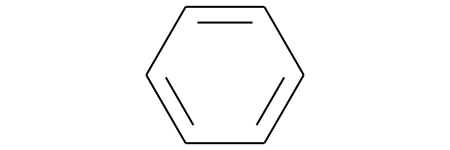

freq : 2902  ; smiles:  C1=CC=CC=C1


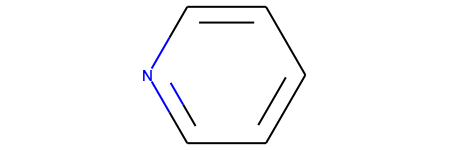

freq : 420  ; smiles:  C1=CC=NC=C1


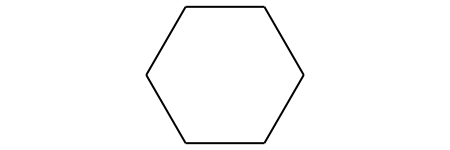

freq : 247  ; smiles:  C1CCCCC1


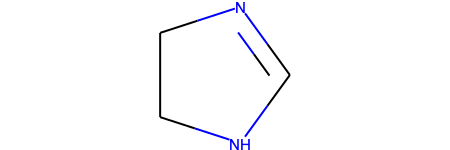

freq : 162  ; smiles:  C1=NCCN1


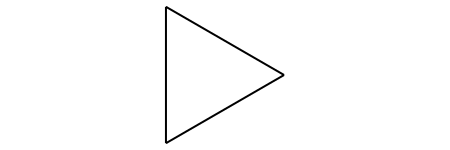

freq : 150  ; smiles:  C1CC1


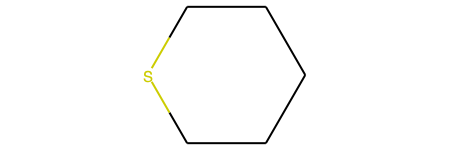

freq : 96  ; smiles:  C1CCSCC1


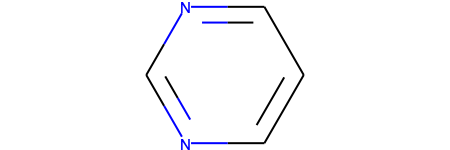

freq : 93  ; smiles:  C1=CN=CN=C1


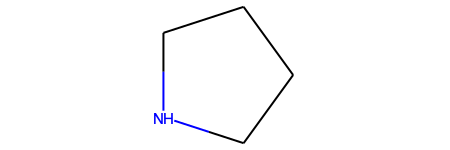

freq : 92  ; smiles:  C1CCNC1


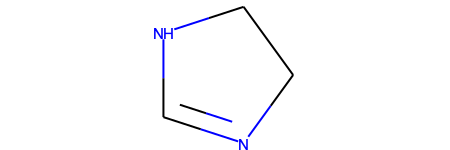

freq : 89  ; smiles:  C1CNC=N1


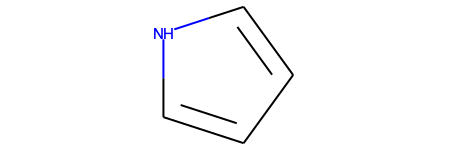

freq : 87  ; smiles:  C1=CNC=C1


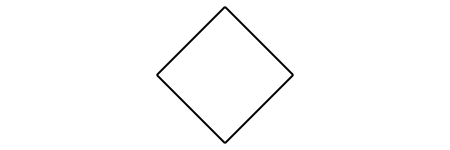

freq : 77  ; smiles:  C1CCC1


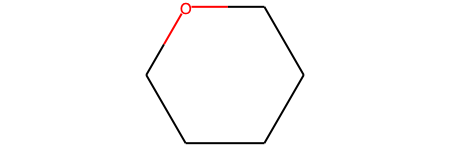

freq : 66  ; smiles:  C1CCCOC1


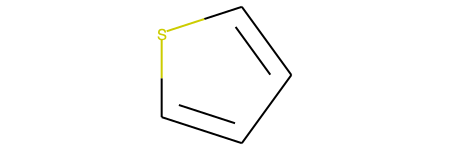

freq : 65  ; smiles:  C1=CSC=C1


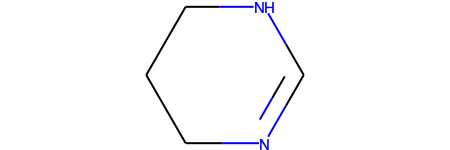

freq : 61  ; smiles:  C1=NCCCN1


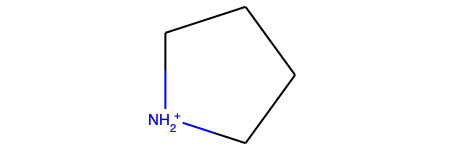

freq : 52  ; smiles:  C1CC[NH2+]C1


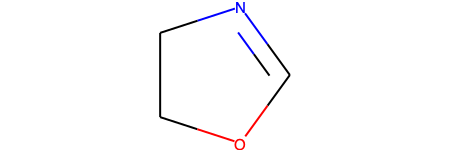

freq : 47  ; smiles:  C1=NCCO1


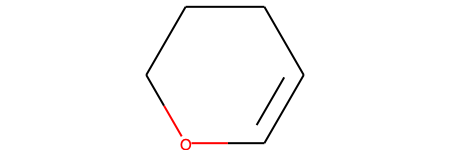

freq : 45  ; smiles:  C1=COCCC1


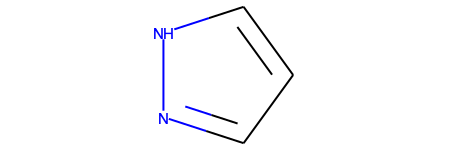

freq : 42  ; smiles:  C1=CNN=C1


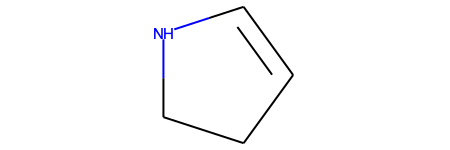

freq : 39  ; smiles:  C1=CNCC1


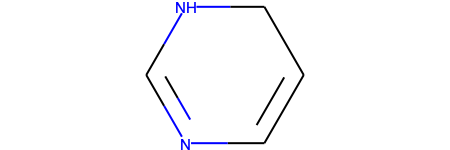

freq : 35  ; smiles:  C1=CN=CNC1


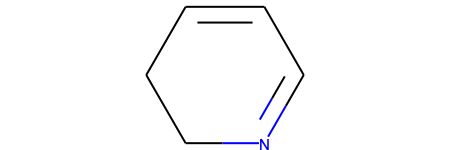

freq : 34  ; smiles:  C1=NCCC=C1


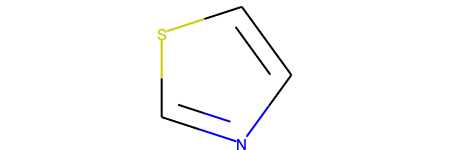

freq : 33  ; smiles:  C1=CSC=N1


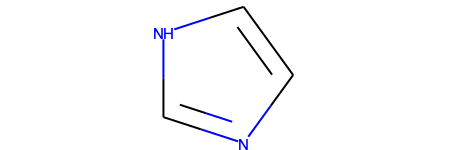

freq : 31  ; smiles:  C1=CNC=N1


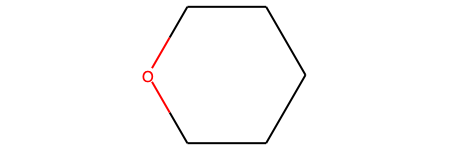

freq : 29  ; smiles:  C1CCOCC1


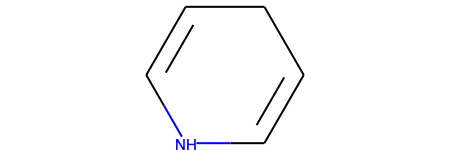

freq : 29  ; smiles:  C1=CNC=CC1


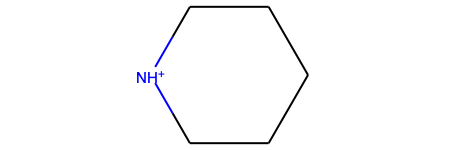

freq : 27  ; smiles:  C1CC[NH+]CC1


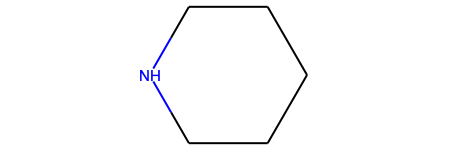

freq : 26  ; smiles:  C1CCNCC1


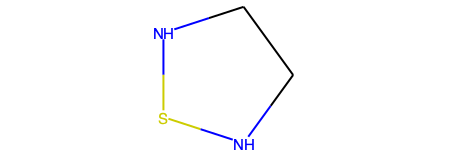

freq : 23  ; smiles:  C1CNSN1


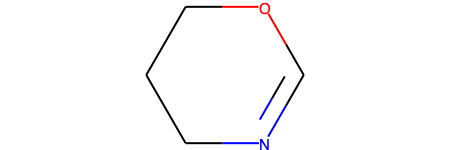

freq : 22  ; smiles:  C1=NCCCO1


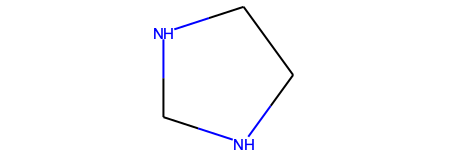

freq : 20  ; smiles:  C1CNCN1


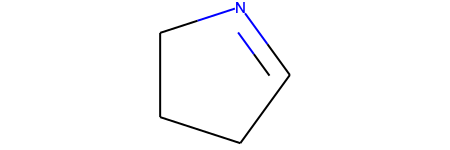

freq : 20  ; smiles:  C1=NCCC1


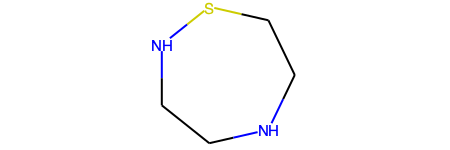

freq : 19  ; smiles:  C1CSNCCN1


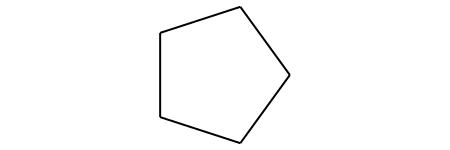

freq : 19  ; smiles:  C1CCCC1


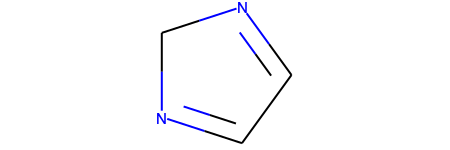

freq : 19  ; smiles:  C1=NCN=C1


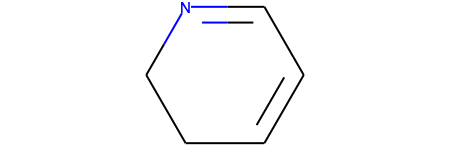

freq : 17  ; smiles:  C1=CCCN=C1


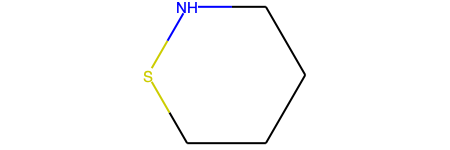

freq : 17  ; smiles:  C1CCSNC1


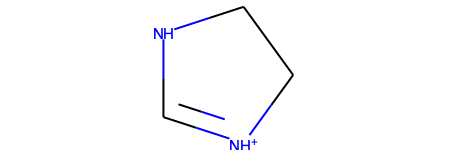

freq : 16  ; smiles:  C1CNC=[NH+]1


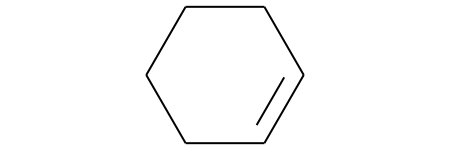

freq : 15  ; smiles:  C1=CCCCC1


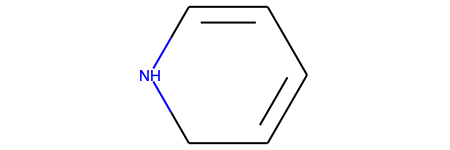

freq : 14  ; smiles:  C1=CCNC=C1


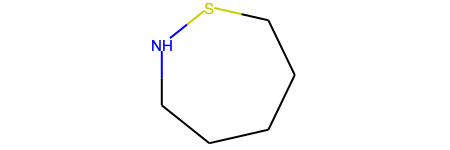

freq : 14  ; smiles:  C1CSNCCC1


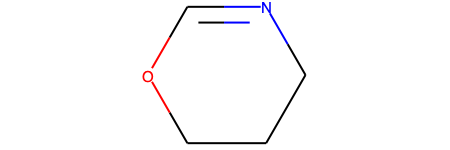

freq : 13  ; smiles:  C1CCOC=N1


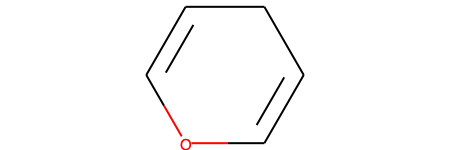

freq : 13  ; smiles:  C1=COC=CC1


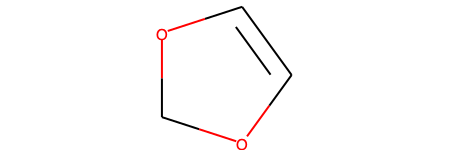

freq : 12  ; smiles:  C1=COCO1


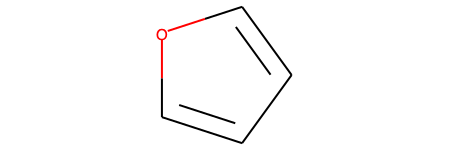

freq : 12  ; smiles:  C1=COC=C1


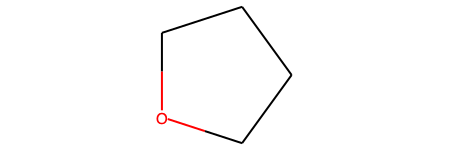

freq : 12  ; smiles:  C1CCOC1


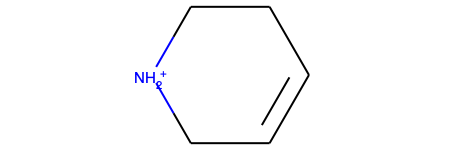

freq : 11  ; smiles:  C1=CC[NH2+]CC1


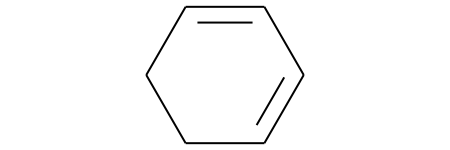

freq : 11  ; smiles:  C1=CCCC=C1


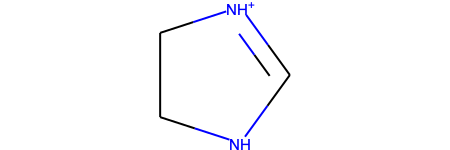

freq : 11  ; smiles:  C1=[NH+]CCN1


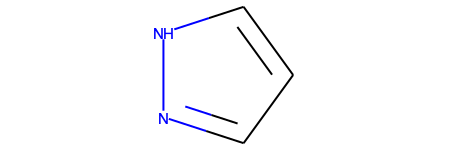

freq : 10  ; smiles:  C1=C[NH]N=C1


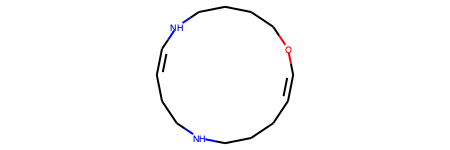

freq : 10  ; smiles:  C1=CCCCNCCC=CNCCCCO1


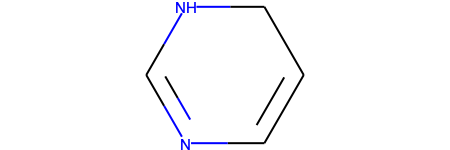

freq : 10  ; smiles:  C1=CN=C[NH]C1


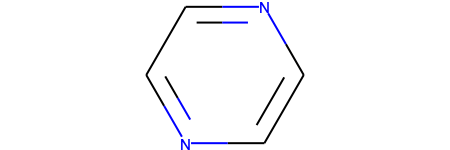

freq : 10  ; smiles:  C1=CN=CC=N1


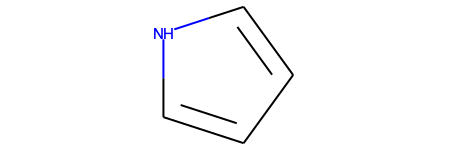

freq : 9  ; smiles:  C1=C[NH]C=C1


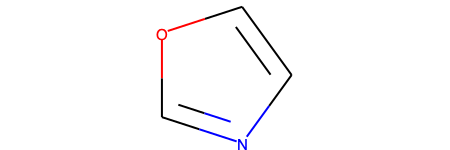

freq : 9  ; smiles:  C1=COC=N1


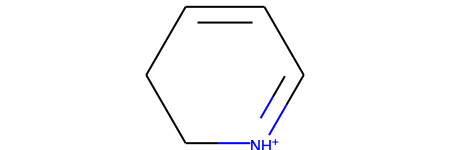

freq : 7  ; smiles:  C1=[NH+]CCC=C1


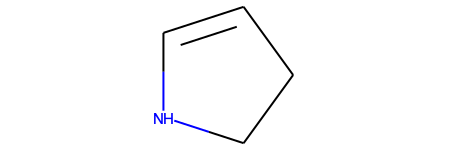

freq : 7  ; smiles:  C1C=CNC1


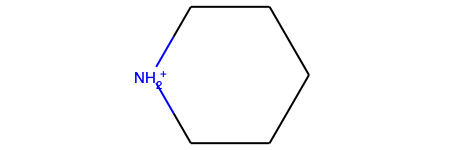

freq : 6  ; smiles:  C1CC[NH2+]CC1


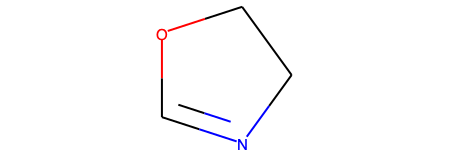

freq : 6  ; smiles:  C1COC=N1


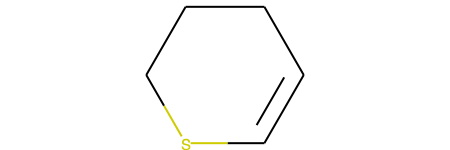

freq : 6  ; smiles:  C1=CSCCC1


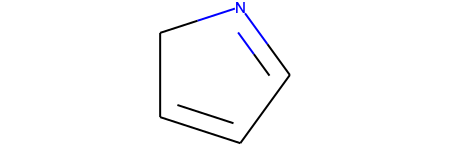

freq : 6  ; smiles:  C1=NCC=C1


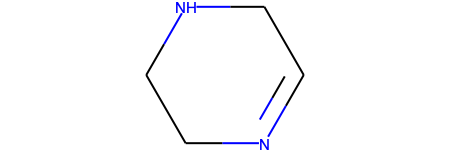

freq : 6  ; smiles:  C1=NCCNC1


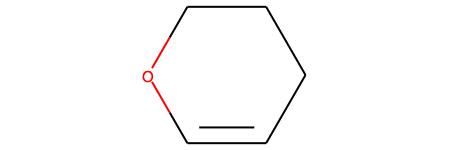

freq : 5  ; smiles:  C1C=COCC1


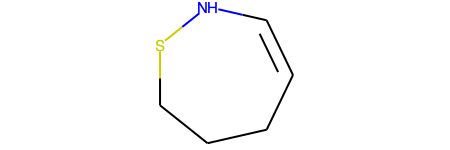

freq : 5  ; smiles:  C1=CNSCCC1


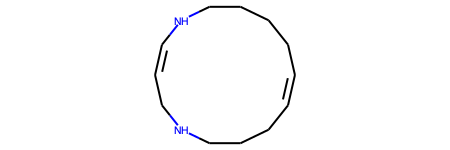

freq : 4  ; smiles:  C1=CCCCNCC=CNCCCC1


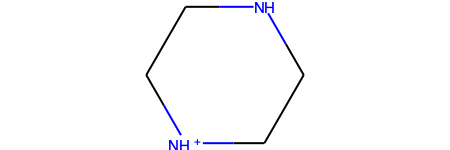

freq : 4  ; smiles:  C1C[NH2+]CCN1


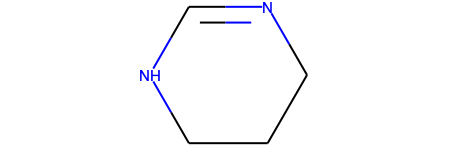

freq : 4  ; smiles:  C1CCNC=N1


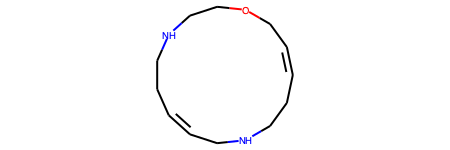

freq : 4  ; smiles:  C1=C/COCCNCCC=CCNCC/1


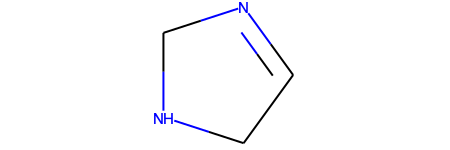

freq : 4  ; smiles:  C1=NCNC1


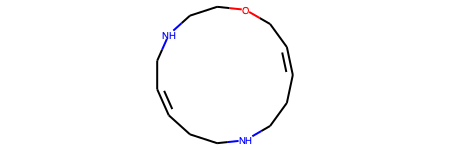

freq : 4  ; smiles:  C1=C/COCCNCC=CCCNCC/1


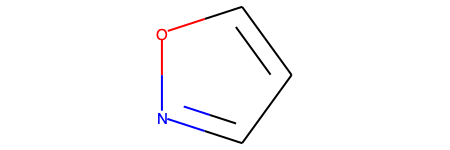

freq : 4  ; smiles:  C1=CON=C1


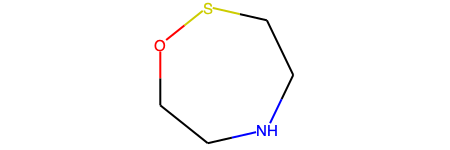

freq : 4  ; smiles:  C1CSOCCN1


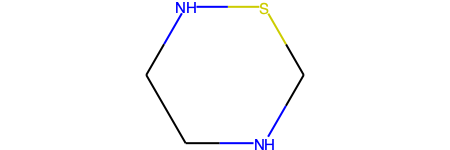

freq : 4  ; smiles:  C1NCCNS1


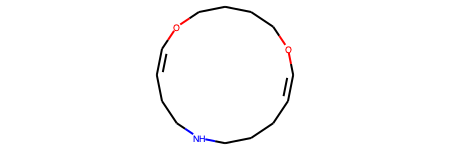

freq : 4  ; smiles:  C1=CCCCNCCC=COCCCCO1


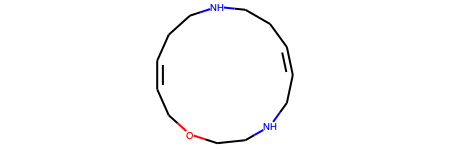

freq : 4  ; smiles:  C1=CCCNCCC=CCOCCNC1


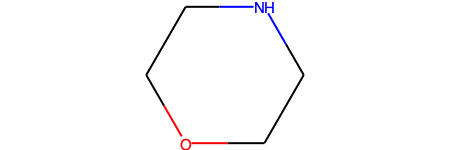

freq : 4  ; smiles:  C1COCCN1


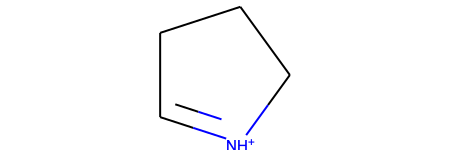

freq : 3  ; smiles:  C1CCC=[NH+]1


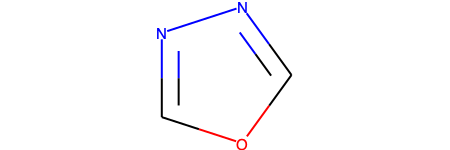

freq : 3  ; smiles:  C1=NN=CO1


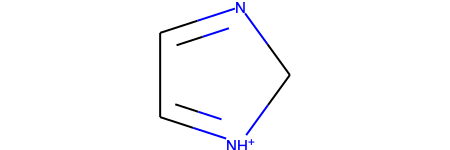

freq : 3  ; smiles:  C1N=CC=[NH+]1


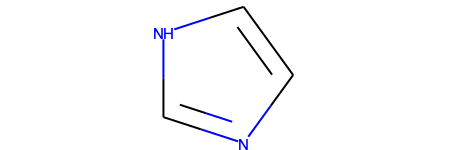

freq : 3  ; smiles:  C1=C[NH]C=N1


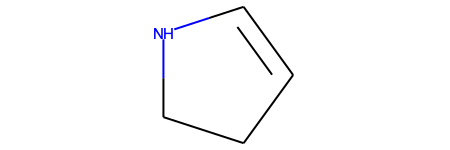

freq : 3  ; smiles:  C1=C[NH]CC1


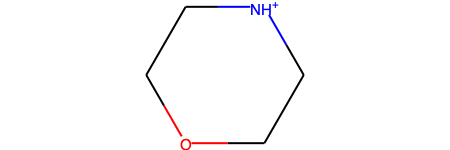

freq : 3  ; smiles:  C1COCC[NH+]1


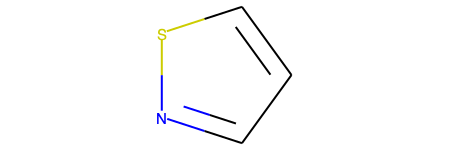

freq : 3  ; smiles:  C1=CSN=C1


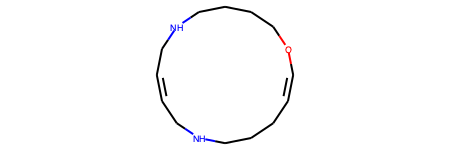

freq : 3  ; smiles:  C1=CCCCNCC=CCNCCCCO1


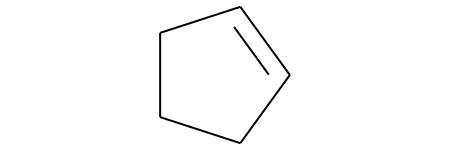

freq : 3  ; smiles:  C1=CCCC1


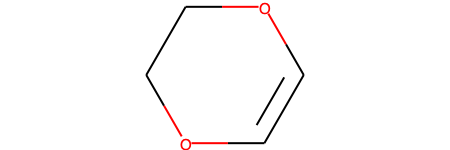

freq : 3  ; smiles:  C1=COCCO1


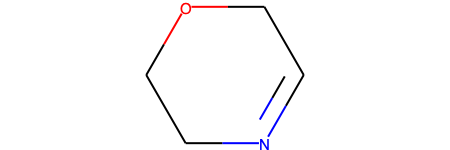

freq : 3  ; smiles:  C1=NCCOC1


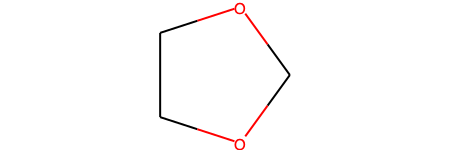

freq : 3  ; smiles:  C1OCCO1


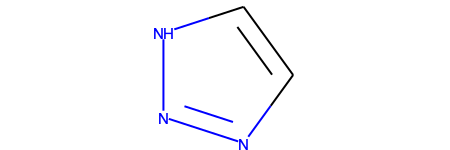

freq : 3  ; smiles:  C1=CNN=N1


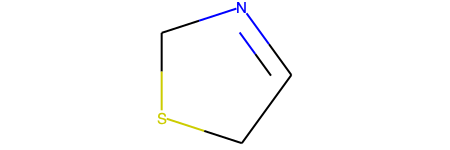

freq : 3  ; smiles:  C1=NCSC1


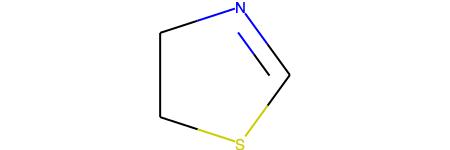

freq : 3  ; smiles:  C1=NCCS1


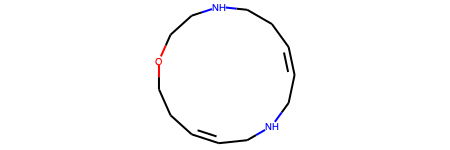

freq : 3  ; smiles:  C1=CCCNCCOCCC=CCNC1


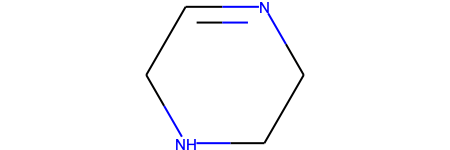

freq : 3  ; smiles:  C1CNCC=N1


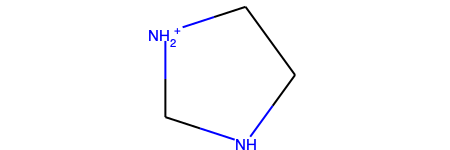

freq : 2  ; smiles:  C1C[NH2+]CN1


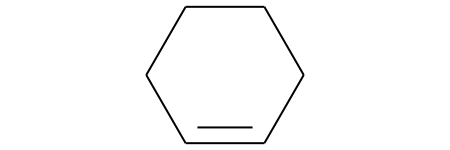

freq : 2  ; smiles:  C1C=CCCC1


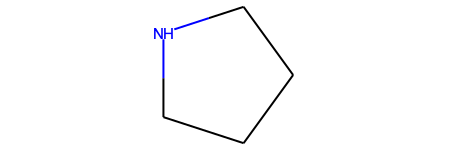

freq : 2  ; smiles:  C1CNCC1


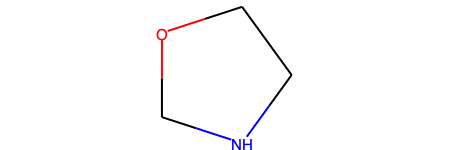

freq : 2  ; smiles:  C1COCN1


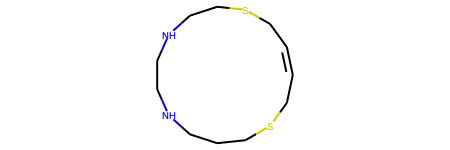

freq : 2  ; smiles:  C1=C/CSCCNCCNCCCSC/1


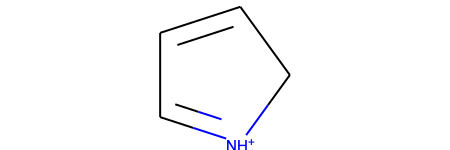

freq : 2  ; smiles:  C1C=CC=[NH+]1


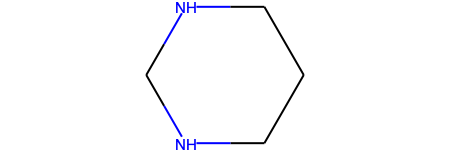

freq : 2  ; smiles:  C1CNCNC1


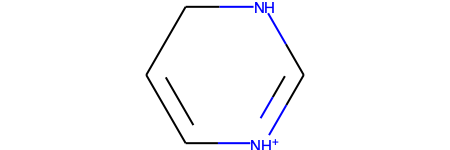

freq : 2  ; smiles:  C1=[NH+]C=CCN1


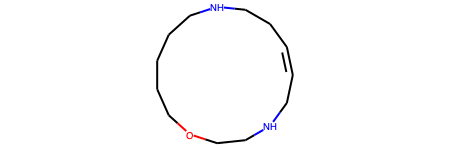

freq : 2  ; smiles:  C1=CCCNCCCCCOCCNC1


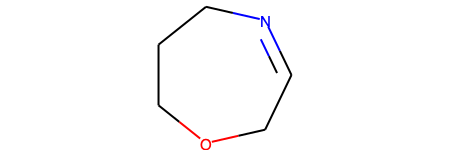

freq : 2  ; smiles:  C1=NCCCOC1


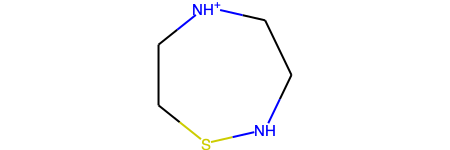

freq : 2  ; smiles:  C1C[NH+]CCSN1


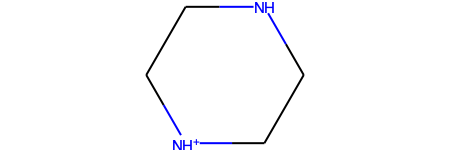

freq : 2  ; smiles:  C1C[NH+]CCN1


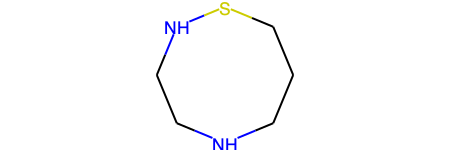

freq : 2  ; smiles:  C1CNCCNSC1


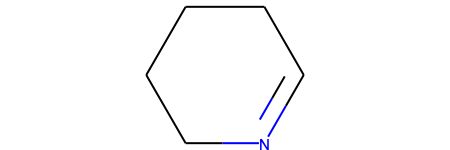

freq : 2  ; smiles:  C1=NCCCC1


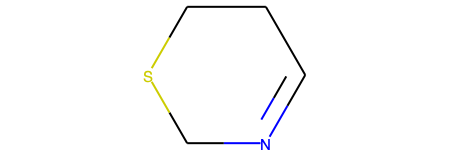

freq : 2  ; smiles:  C1=NCSCC1


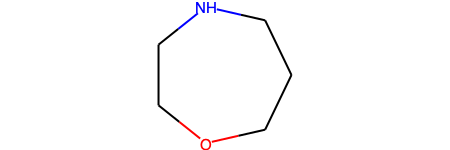

freq : 2  ; smiles:  C1CNCCOC1


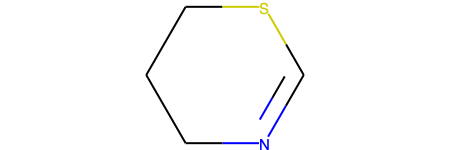

freq : 2  ; smiles:  C1=NCCCS1


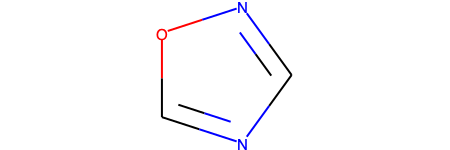

freq : 2  ; smiles:  C1=NOC=N1


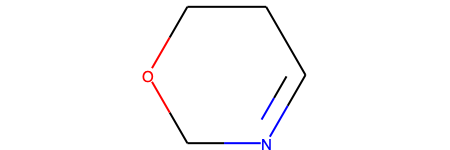

freq : 2  ; smiles:  C1=NCOCC1


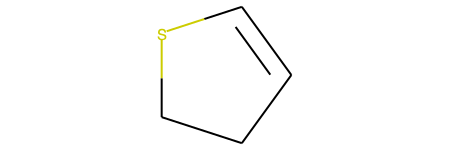

freq : 1  ; smiles:  C1=CSCC1


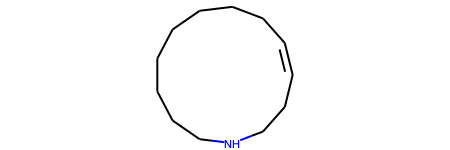

freq : 1  ; smiles:  C1=CCCCCCCCCNCC1


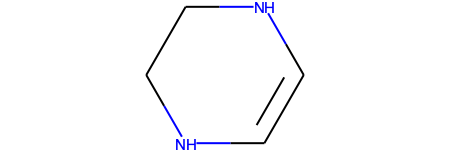

freq : 1  ; smiles:  C1=CNCCN1


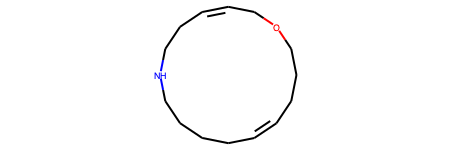

freq : 1  ; smiles:  C1CC=CCCCCNCCC=CCOC1


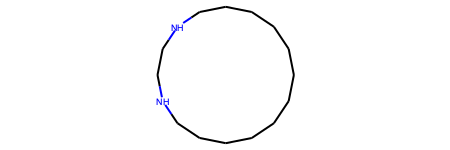

freq : 1  ; smiles:  C1CCCCCCNCCNCCCCC1


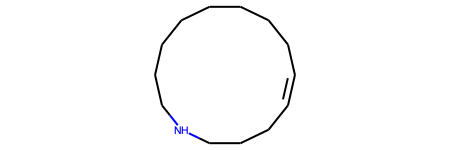

freq : 1  ; smiles:  C1=CCCCNCCCCCCCC1


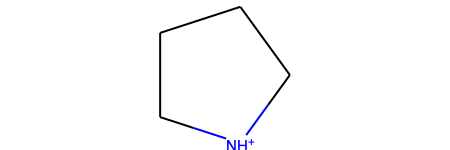

freq : 1  ; smiles:  C1CCC[NH+]1


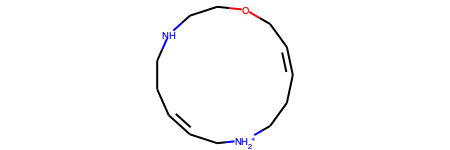

freq : 1  ; smiles:  C1=C/COCCNCCC=CC[NH2+]CC/1


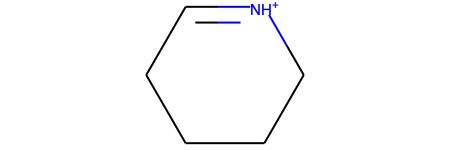

freq : 1  ; smiles:  C1CCCC=[NH+]1


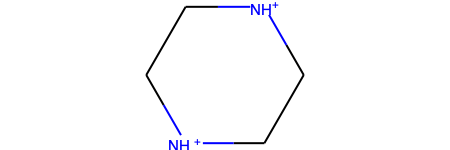

freq : 1  ; smiles:  C1C[NH2+]CC[NH+]1


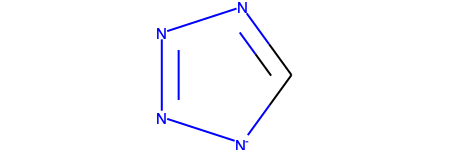

freq : 1  ; smiles:  C1=NN=N[N-]1


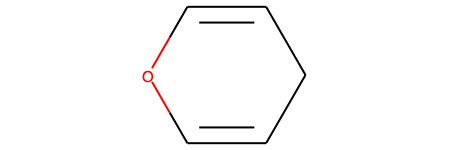

freq : 1  ; smiles:  C1C=COC=C1


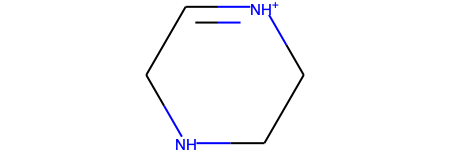

freq : 1  ; smiles:  C1CNCC=[NH+]1


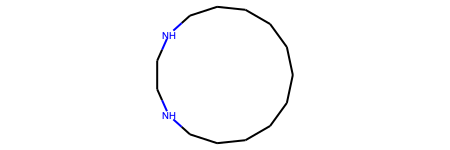

freq : 1  ; smiles:  C1CCCCCNCCNCCCCC1


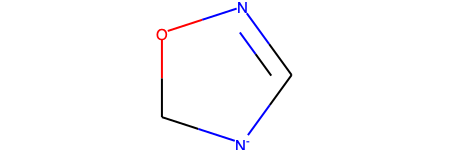

freq : 1  ; smiles:  C1=NOC[N-]1


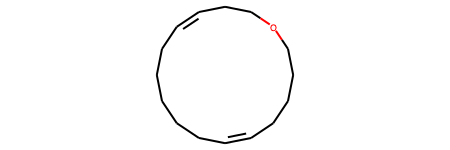

freq : 1  ; smiles:  C1CCC=CCCCCCC=CCCOC1


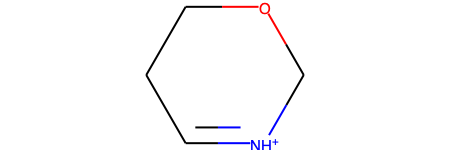

freq : 1  ; smiles:  C1[NH+]=CCCO1


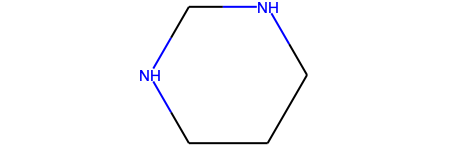

freq : 1  ; smiles:  C1CCNCN1


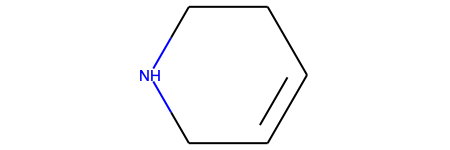

freq : 1  ; smiles:  C1=CCNCC1


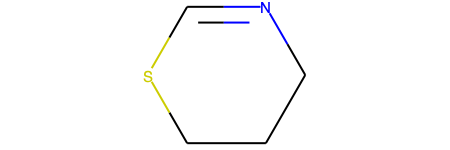

freq : 1  ; smiles:  C1CCSC=N1


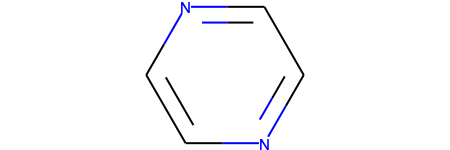

freq : 1  ; smiles:  C1=NC=CN=C1


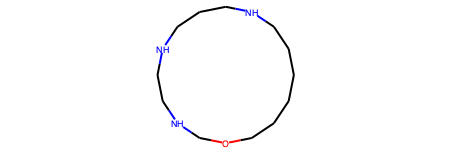

freq : 1  ; smiles:  C1CCCOCNCCNCCCNCC1


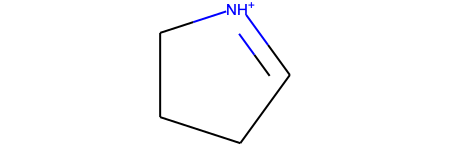

freq : 1  ; smiles:  C1=[NH+]CCC1


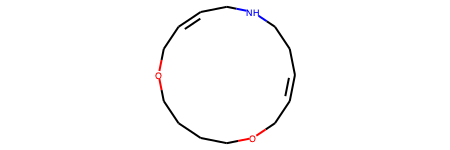

freq : 1  ; smiles:  C1=CCOCCCCOCC=CCNCC1


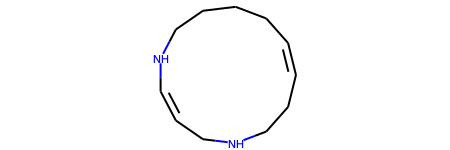

freq : 1  ; smiles:  C1=CCCCCNC=CCNCC1


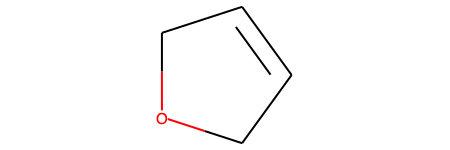

freq : 1  ; smiles:  C1=CCOC1


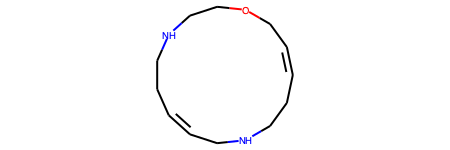

freq : 1  ; smiles:  C1=C\COCCNCCC=CCNCC/1


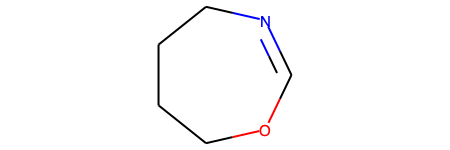

freq : 1  ; smiles:  C1=NCCCCO1


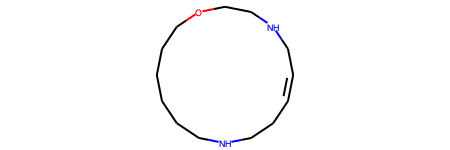

freq : 1  ; smiles:  C1=CCCNCCCCCCOCCNC1


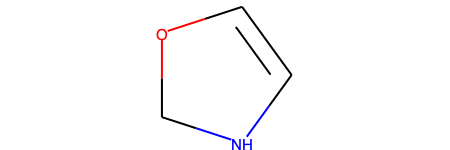

freq : 1  ; smiles:  C1=COCN1


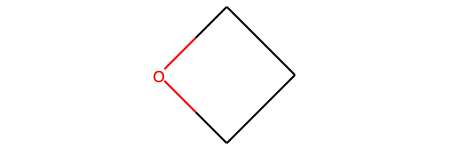

freq : 1  ; smiles:  C1COC1


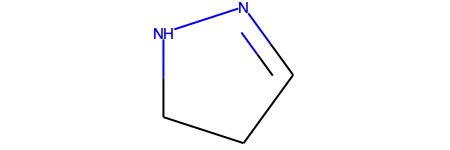

freq : 1  ; smiles:  C1=NNCC1


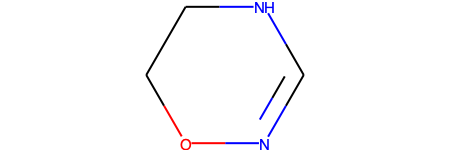

freq : 1  ; smiles:  C1=NOCCN1


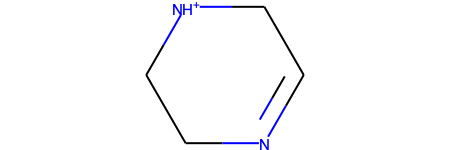

freq : 1  ; smiles:  C1=NCC[NH+]C1


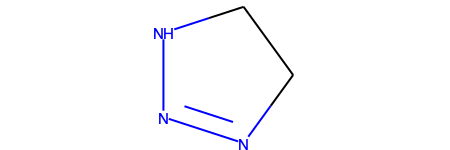

freq : 1  ; smiles:  C1CNN=N1


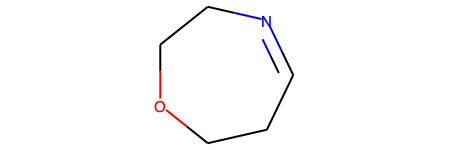

freq : 1  ; smiles:  C1=NCCOCC1


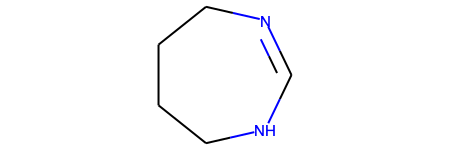

freq : 1  ; smiles:  C1=NCCCCN1


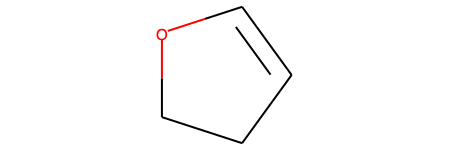

freq : 1  ; smiles:  C1=COCC1


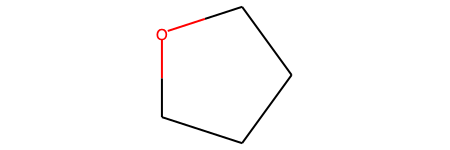

freq : 1  ; smiles:  C1COCC1


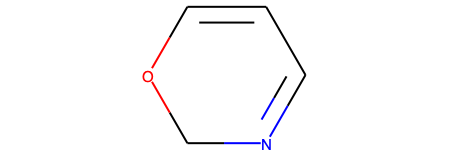

freq : 1  ; smiles:  C1=NCOC=C1


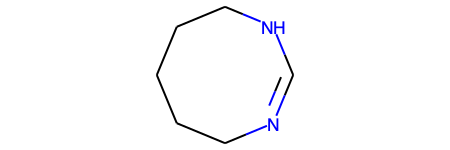

freq : 1  ; smiles:  C1=NCCCCCN1


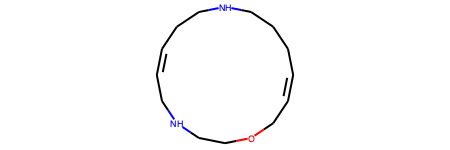

freq : 1  ; smiles:  C1=C/COCCNCC=CCCNCCC/1


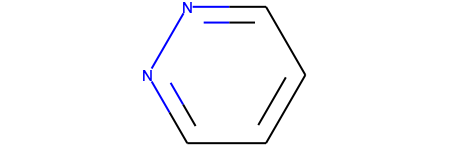

freq : 1  ; smiles:  C1=CC=NN=C1


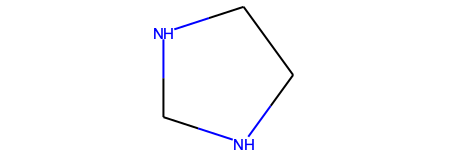

freq : 1  ; smiles:  C1CNC[NH]1


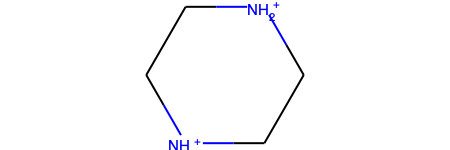

freq : 1  ; smiles:  C1C[NH2+]CC[NH2+]1


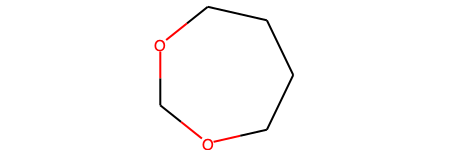

freq : 1  ; smiles:  C1CCOCOC1


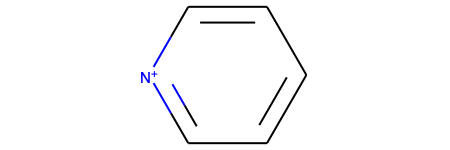

freq : 1  ; smiles:  C1=CC=[N+]C=C1


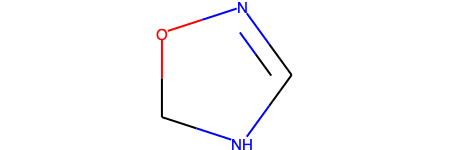

freq : 1  ; smiles:  C1=NOC[NH]1


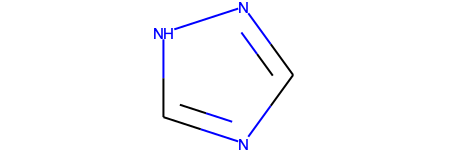

freq : 1  ; smiles:  C1=N[NH]C=N1


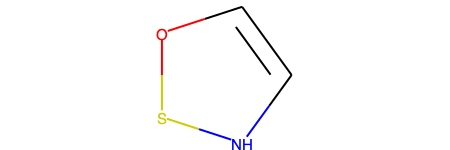

freq : 1  ; smiles:  C1=COSN1


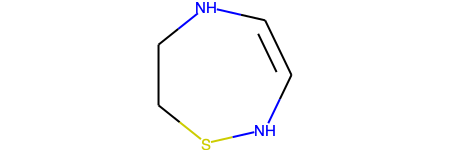

freq : 1  ; smiles:  C1=CNCCSN1


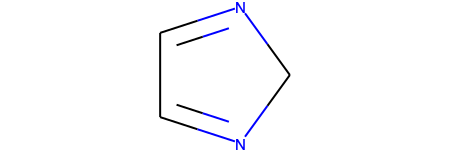

freq : 1  ; smiles:  C1N=CC=N1


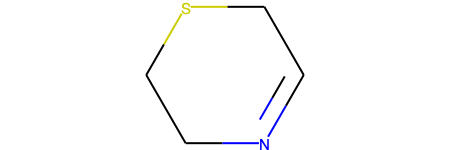

freq : 1  ; smiles:  C1=NCCSC1


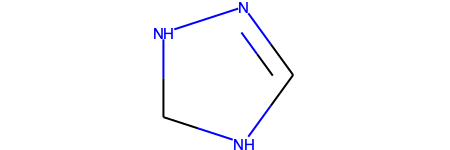

freq : 1  ; smiles:  C1=N[NH]C[NH]1


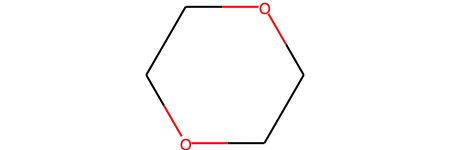

freq : 1  ; smiles:  C1COCCO1


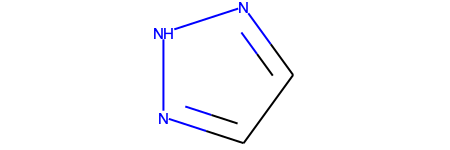

freq : 1  ; smiles:  C1=NNN=C1


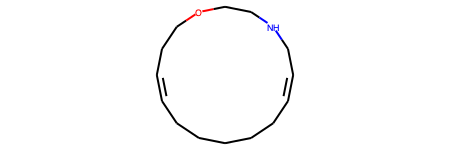

freq : 1  ; smiles:  C1=CCCCCCC=CCCOCCNC1


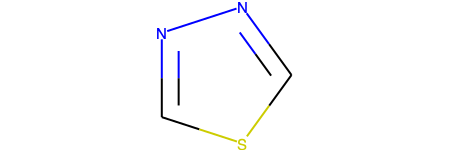

freq : 1  ; smiles:  C1=NN=CS1


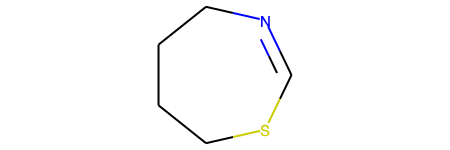

freq : 1  ; smiles:  C1=NCCCCS1


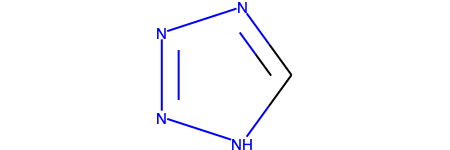

freq : 1  ; smiles:  C1=NN=N[NH]1


In [108]:
for smiles_r, count in sorted(dist_smiles_rings.items(), key=lambda item: item[1], reverse=True):
    m = Chem.MolFromSmiles(smiles_r)
    if m.GetNumAtoms() > 2:
        display(m)
        print('freq :', dist_smiles_rings[smiles_r], ' ; smiles: ', smiles_r)

In [55]:
Chem.MolFromSmiles('C1CSNccn1')

RDKit ERROR: [18:45:15] Can't kekulize mol.  Unkekulized atoms: 4 5 6
RDKit ERROR: 
